In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division


from datetime import datetime, timedelta


In [66]:
file_path = '~/Desktop/retailer_data.csv'

df = pd.read_csv(file_path)

In [67]:
df.head()

,order_number,line_item,order_date,customer_key,store_key,product_key,quantity,currency_code,product_name,brand,...,city,gender,zip_code,birthday,birth_year,order_year,order_month,age_purchase,age_group,years_open
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,...,London,Male,N5W 5K6,1971-03-23,1971,2016,1,45,36-45,0.745205
1,1749017,1,2019-10-15,265598,0,1619,1,CAD,Contoso DVD Player M130 Grey,Contoso,...,London,Male,N5W 5K6,1971-03-23,1971,2019,10,48,46-55,9.791781
2,1749017,3,2019-10-15,265598,0,52,1,CAD,WWI 2GB Pulse Smart pen M100 Silver,Wide World Importers,...,London,Male,N5W 5K6,1971-03-23,1971,2019,10,48,46-55,9.791781
3,1749017,2,2019-10-15,265598,0,1764,2,CAD,MGS Age of Empires II: The Age of Kings E126,Tailspin Toys,...,London,Male,N5W 5K6,1971-03-23,1971,2019,10,48,46-55,9.791781
4,891000,2,2017-06-09,265598,9,174,1,CAD,SV 22xDVD M600 Black,Southridge Video,...,London,Male,N5W 5K6,1971-03-23,1971,2017,6,46,46-55,12.273973


# Building Metrics 

In the previous step, we conducted exploratory data analysis (EDA) to gain an initial understanding of our data and business. This revealed important insights about our products, sales history, and customer base. In this notebook, we will delve deeper to expand on this knowledge, capturing greater insights into the core value that our products deliver to customers.

**The North Star Metric** we will select is our Monthly Revenue, and we will build upon all the metrics listed below. In the next notebook, we will focus on segmenting our customers to better understand their purchasing behavior and the value they bring to the business.

- Monthly Revenue
- Monthly Revenue Growth Rate
- Monthly Active Customers
- Monthly Order Count
- Average Revenue per Order
- Monthly Order Average
- New Customer Ratio 
- Monthly Retention Rate
- Cohort Based Retention Rate

# Monthly Revenue

In [68]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [69]:
#Create Order YearMonth feauture for ease of reporting and visualization 

df['order_year_month'] = df['order_date'].map(lambda date: 100*date.year + date.month)

In [70]:
df['order_year_month'].head(1)

0    201601
Name: order_year_month, dtype: int64

In [71]:
df['order_year_month'].nunique()

62

The data looks at a 62 month buisness cycle

In [72]:
df = df.rename(columns={'sales': 'revenue'})

In [73]:
df_monthly_revenue = df.groupby(['order_year_month'])['revenue'].sum().reset_index()
df_monthly_revenue

,order_year_month,revenue
0,201601,649918.78
1,201602,891098.30
2,201603,338407.36
3,201604,110591.63
4,201605,595986.18
...,...,...
57,202010,245647.59
58,202011,256701.02
59,202012,651526.44
60,202101,513021.58


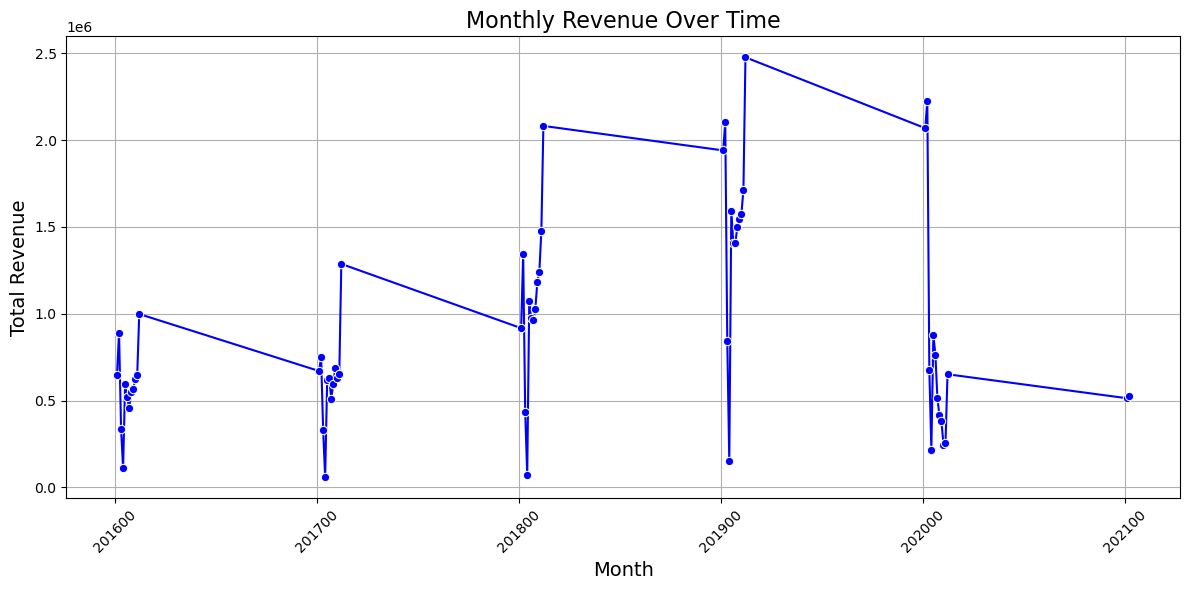

In [74]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_year_month', y='revenue', data=df_monthly_revenue, marker='o', color='blue')

# Customize labels and title
plt.title('Monthly Revenue Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

# Format the x-axis for better readability (optional)
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

Our revenue shows consistent growth up until 2019-2020, when it experiences a decline. The data for 2021 is incomplete. Let's calculate the Monthly Revenue Growth Rate

# Monthly Revenue Growth Rate

In [75]:
df['monthly_growth'] = df_monthly_revenue['revenue'].pct_change()
df['monthly_growth'].head()

0         NaN
1    0.371092
2   -0.620236
3   -0.673200
4    4.389071
Name: monthly_growth, dtype: float64

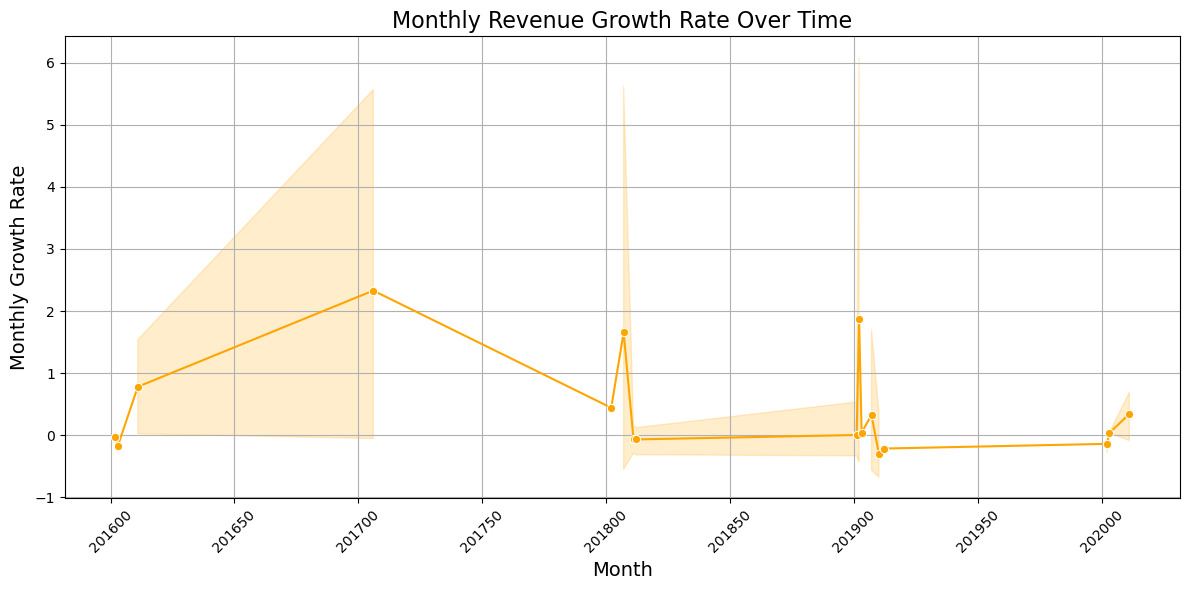

In [76]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_year_month', y='monthly_growth', data=df, marker='o', color='orange')

# Customize labels and title
plt.title('Monthly Revenue Growth Rate Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly Growth Rate', fontsize=14)

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

The Monthly Revenue Growth Rate looks promising, showing positive growth for most of the business lifecycle, with only a slight decline after 2019. We should delve deeper to understand the factors driving both the positive and negative growth rates. We can consider whether these changes were due to fluctuations in customer activity or if customers placed smaller orders.

# **Monthly Active Customers**

In [77]:
#Count the number of unique Customers by month

monthly_active = df.groupby('order_year_month')['customer_key'].nunique().reset_index()
monthly_active

,order_year_month,customer_key
0,201601,289
1,201602,327
2,201603,109
3,201604,41
4,201605,219
...,...,...
57,202010,159
58,202011,149
59,202012,314
60,202101,252


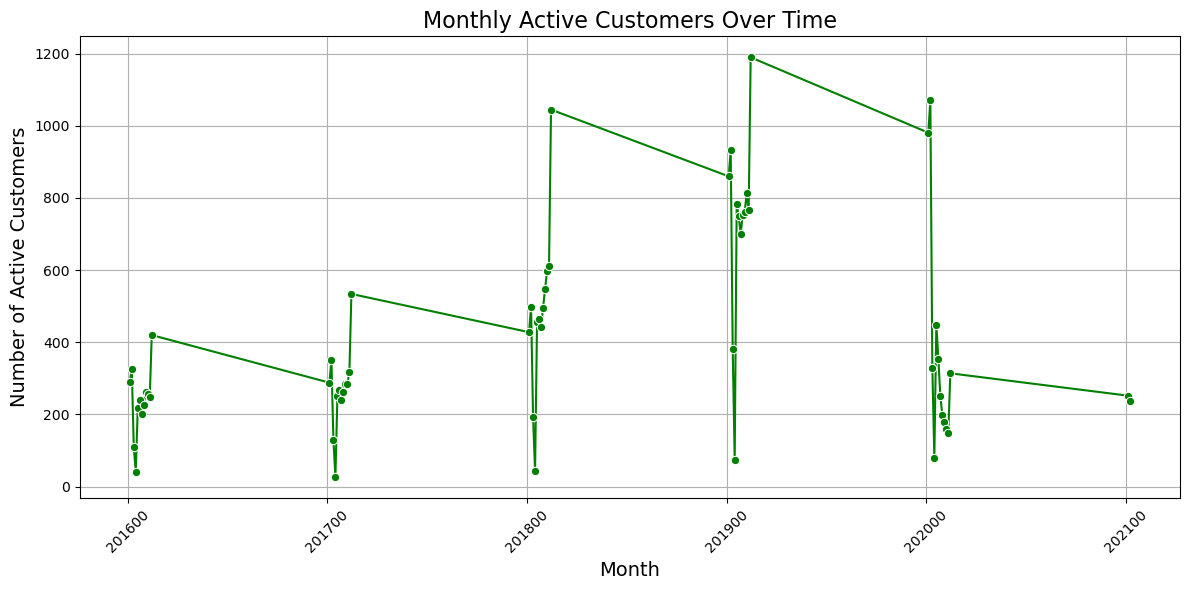

In [78]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_year_month', y='customer_key', data=monthly_active, marker='o', color='green')

# Customize labels and title
plt.title('Monthly Active Customers Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Active Customers', fontsize=14)

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# **Monthly Order Count**

The same code will be applied by using the Quantity field:

In [79]:
monthly_sales = df.groupby('order_year_month')['quantity'].sum().reset_index()
monthly_sales

,order_year_month,quantity
0,201601,2116
1,201602,2676
2,201603,895
3,201604,326
4,201605,1646
...,...,...
57,202010,1042
58,202011,1044
59,202012,2411
60,202101,1848


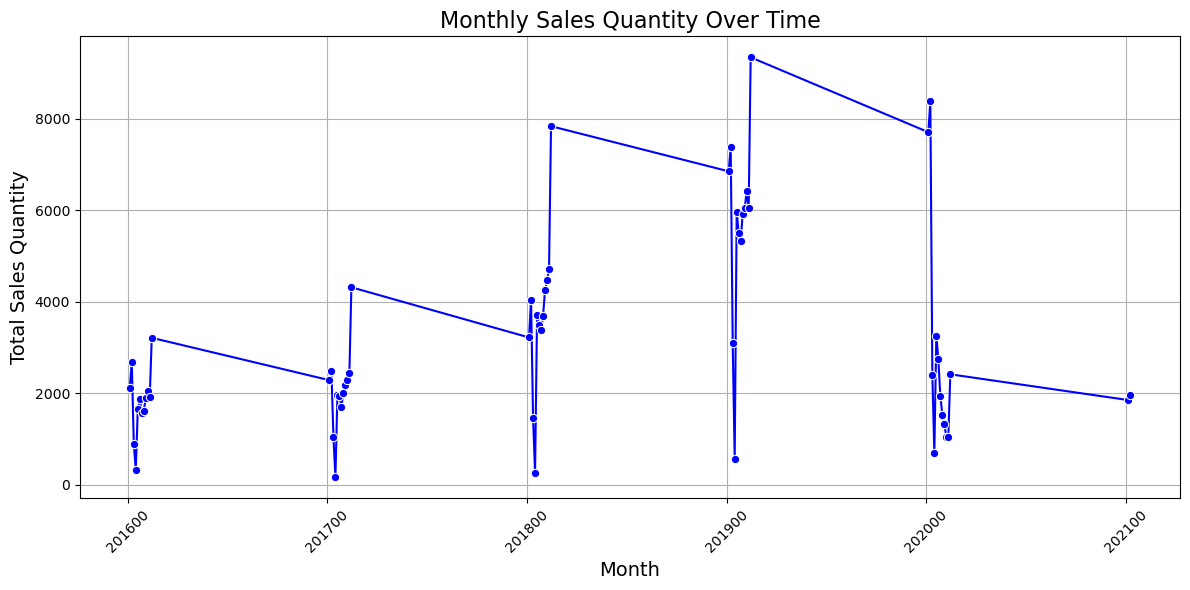

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_year_month', y='quantity', data=monthly_sales, marker='o', color='blue')

# Customize labels and title
plt.title('Monthly Sales Quantity Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Quantity', fontsize=14)

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

As we expected, the order count follows a similar trend as monthly revenue and active customers. 

# Average Revenue per Order

In [81]:
monthly_order_avg = df.groupby('order_year_month')['revenue'].mean().reset_index()
monthly_order_avg

,order_year_month,revenue
0,201601,975.854024
1,201602,1093.372147
2,201603,1212.929606
3,201604,1043.317264
4,201605,1189.593174
...,...,...
57,202010,726.768018
58,202011,721.070281
59,202012,856.145125
60,202101,831.477439


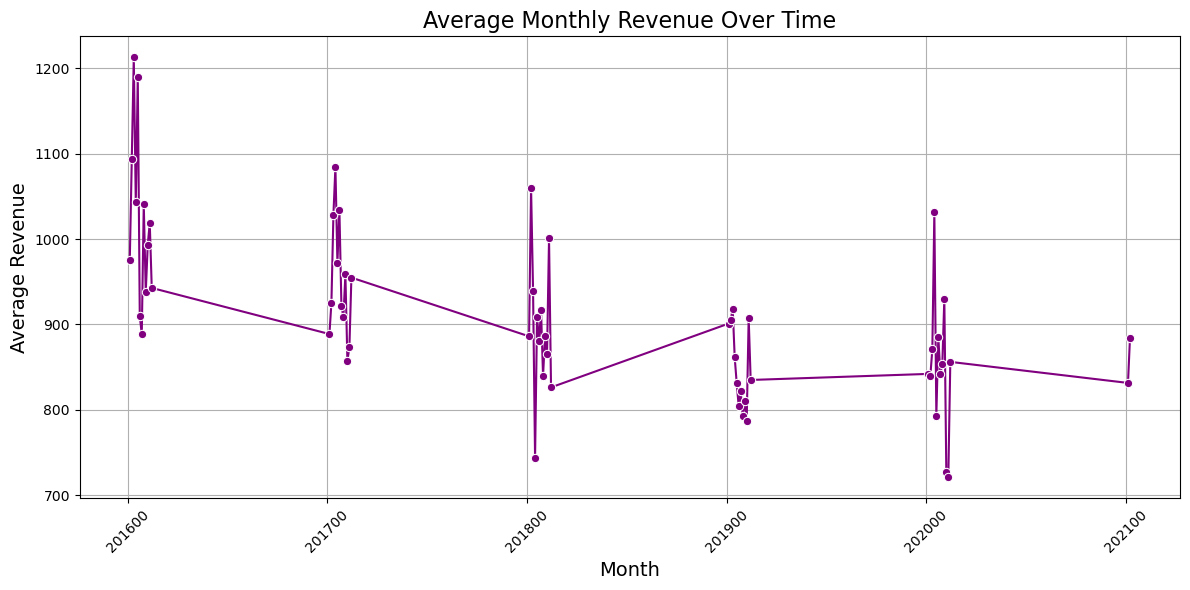

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_year_month', y='revenue', data=monthly_order_avg, marker='o', color='purple')

# Customize labels and title
plt.title('Average Monthly Revenue Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Revenue', fontsize=14)

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

This is a key observation: our average monthly revenue seems to decline over time. Further analysis will help us determine whether this drop is due to customers purchasing less expensive products or a potential decrease in retention among high-value customers.

# New Customer Ratio

First we should define what is a new customer. In our dataset, we can assume a new customer is *anyone who had more than one purchase in a time period we define*.

We will be using .min() function to find our first purchase date for each customer and define new customers based on that. The code below will apply this function and show us the revenue breakdown for each group monthly.

In [83]:
# Create a DataFrame for each customer and their first purchase date
min_purchase = df.groupby('customer_key')['order_date'].min().reset_index()
min_purchase

,customer_key,order_date
0,301,2019-11-11
1,325,2018-01-13
2,554,2018-01-04
3,1042,2018-03-06
4,1314,2017-12-19
...,...,...
11882,2099383,2018-07-19
11883,2099600,2018-08-08
11884,2099758,2019-08-31
11885,2099862,2020-01-01


In [84]:
df['customer_key'].nunique()

11887

In [85]:
min_purchase.columns = ['customer_key', 'MinPurchaseDate']
min_purchase

,customer_key,MinPurchaseDate
0,301,2019-11-11
1,325,2018-01-13
2,554,2018-01-04
3,1042,2018-03-06
4,1314,2017-12-19
...,...,...
11882,2099383,2018-07-19
11883,2099600,2018-08-08
11884,2099758,2019-08-31
11885,2099862,2020-01-01


In [86]:
min_purchase['MinPurchaseYearMonth'] = min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
min_purchase


,customer_key,MinPurchaseDate,MinPurchaseYearMonth
0,301,2019-11-11,201911
1,325,2018-01-13,201801
2,554,2018-01-04,201801
3,1042,2018-03-06,201803
4,1314,2017-12-19,201712
...,...,...,...
11882,2099383,2018-07-19,201807
11883,2099600,2018-08-08,201808
11884,2099758,2019-08-31,201908
11885,2099862,2020-01-01,202001


In [87]:
df = pd.merge(df, min_purchase, on='customer_key')
df.head()

,order_number,line_item,order_date,customer_key,store_key,product_key,quantity,currency_code,product_name,brand,...,birth_year,order_year,order_month,age_purchase,age_group,years_open,order_year_month,monthly_growth,MinPurchaseDate,MinPurchaseYearMonth
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,...,1971,2016,1,45,36-45,0.745205,201601,NaN,2016-01-01,201601
1,1749017,1,2019-10-15,265598,0,1619,1,CAD,Contoso DVD Player M130 Grey,Contoso,...,1971,2019,10,48,46-55,9.791781,201910,0.371092,2016-01-01,201601
2,1749017,3,2019-10-15,265598,0,52,1,CAD,WWI 2GB Pulse Smart pen M100 Silver,Wide World Importers,...,1971,2019,10,48,46-55,9.791781,201910,-0.620236,2016-01-01,201601
3,1749017,2,2019-10-15,265598,0,1764,2,CAD,MGS Age of Empires II: The Age of Kings E126,Tailspin Toys,...,1971,2019,10,48,46-55,9.791781,201910,-0.673200,2016-01-01,201601
4,891000,2,2017-06-09,265598,9,174,1,CAD,SV 22xDVD M600 Black,Southridge Video,...,1971,2017,6,46,46-55,12.273973,201706,4.389071,2016-01-01,201601


In [129]:
#Now we'll create a column called User Type and assign it Existing
df['user_type'] = 'New'
df.loc[df['order_year_month'] > df['MinPurchaseYearMonth'], 'user_type'] = 'Existing'

#Remember, order_year_month is the time someone placed an order.
#So if any unique customer placed an order after their first order, they are considered existing customers

In [90]:
df['user_type'].head(2)

0         New
1    Existing
Name: user_type, dtype: object

In [128]:
df['user_type'].value_counts()

Existing    33764
New         29120
Name: user_type, dtype: int64

In [130]:
#Lets look at a single unique customer
unique_customer = df.loc[df.customer_key == 265598.0]
unique_customer

,order_number,line_item,order_date,customer_key,store_key,product_key,quantity,currency_code,product_name,brand,...,order_year,order_month,age_purchase,age_group,years_open,order_year_month,monthly_growth,MinPurchaseDate,MinPurchaseYearMonth,user_type
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,...,2016,1,45,36-45,0.745205,201601,NaN,2016-01-01,201601,New
1,1749017,1,2019-10-15,265598,0,1619,1,CAD,Contoso DVD Player M130 Grey,Contoso,...,2019,10,48,46-55,9.791781,201910,0.371092,2016-01-01,201601,Existing
2,1749017,3,2019-10-15,265598,0,52,1,CAD,WWI 2GB Pulse Smart pen M100 Silver,Wide World Importers,...,2019,10,48,46-55,9.791781,201910,-0.620236,2016-01-01,201601,Existing
3,1749017,2,2019-10-15,265598,0,1764,2,CAD,MGS Age of Empires II: The Age of Kings E126,Tailspin Toys,...,2019,10,48,46-55,9.791781,201910,-0.673200,2016-01-01,201601,Existing
4,891000,2,2017-06-09,265598,9,174,1,CAD,SV 22xDVD M600 Black,Southridge Video,...,2017,6,46,46-55,12.273973,201706,4.389071,2016-01-01,201601,Existing
5,891000,1,2017-06-09,265598,9,385,2,CAD,Adventure Works Laptop8.9 E0890 Red,Adventure Works,...,2017,6,46,46-55,12.273973,201706,-0.129870,2016-01-01,201601,Existing
6,891000,4,2017-06-09,265598,9,87,1,CAD,NT Wireless Bluetooth Stereo Headphones M402 P...,Northwind Traders,...,2017,6,46,46-55,12.273973,201706,-0.122690,2016-01-01,201601,Existing
7,891000,3,2017-06-09,265598,9,685,1,CAD,"Proseware Desk Jet All-in-One Printer, Scanner...",Proseware,...,2017,6,46,46-55,12.273973,201706,0.203431,2016-01-01,201601,Existing


We can see that their first purchase in 2016 was labeled as New in the user_type field, and all subsequent purchases after that we're marked as an Existing customer. 

In [131]:
#Calculate the revenue per month for each user type
user_type_revenue = df.groupby(['order_year_month', 'user_type'])['revenue'].sum().reset_index()
user_type_revenue

,order_year_month,user_type,revenue
0,201601,New,649918.78
1,201602,Existing,55659.55
2,201602,New,835438.75
3,201603,Existing,37282.72
4,201603,New,301124.64
...,...,...,...
118,202012,New,126859.34
119,202101,Existing,429266.64
120,202101,New,83754.94
121,202102,Existing,477283.82


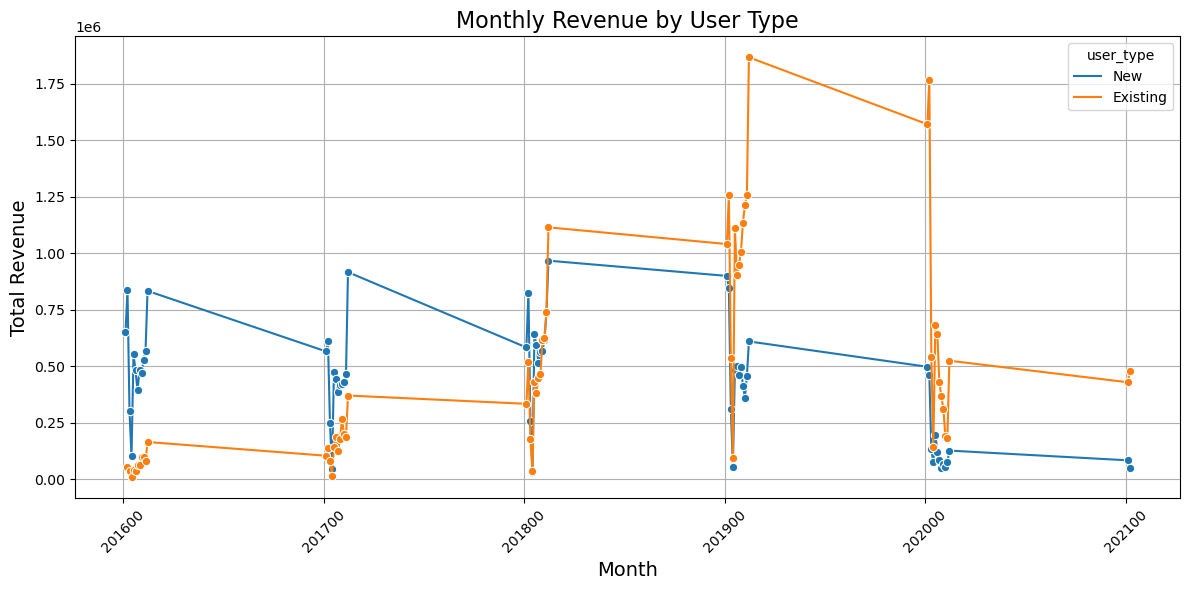

In [94]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=user_type_revenue, x='order_year_month', y='revenue', hue='user_type', marker='o')

# Customize labels and title
plt.title('Monthly Revenue by User Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

Existing customers are showing a positive trend and tell us that our customer base is growing but new customers have a slight negative trend.

# New Customer Ratio

In [132]:
new_user_ratio = (
    # Query for New users
    df.query("user_type == 'New'").groupby(['order_year_month'])['customer_key'].nunique()
    /
    #Query for existing users 
    df.query("user_type == 'Existing'").groupby(['order_year_month'])['customer_key'].nunique()
)
new_user_ratio = user_ratio.reset_index()
new_user_ratio

,index,order_year_month,UserRatio
0,1,201602,35.333333
1,2,201603,17.166667
2,3,201604,19.500000
3,4,201605,35.500000
4,5,201606,11.000000
...,...,...,...
56,57,202010,0.314050
57,58,202011,0.284483
58,59,202012,0.256000
59,60,202101,0.155963


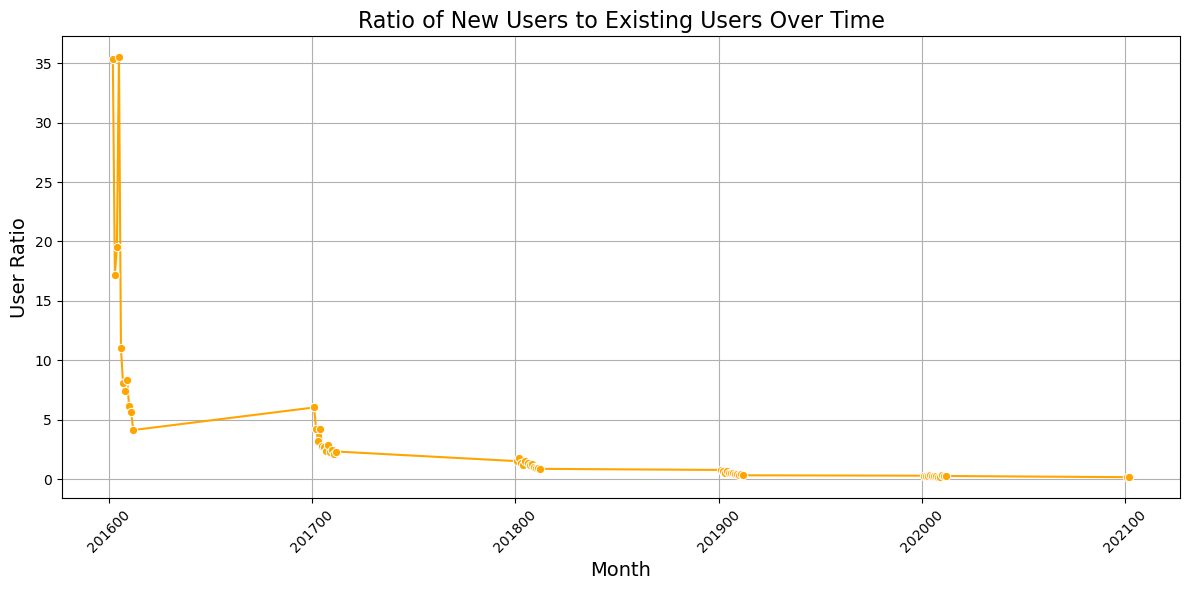

In [103]:
# Let's plot this to visiualize 

new_user_ratio = user_ratio.dropna()

new_user_ratio.columns = ['order_year_month', 'NewUserRatio']  # Rename columns if needed

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=new_user_ratio, x='order_year_month', y='NewUserRatio', marker='o', color='orange')

# Customize labels and title
plt.title('Ratio of New Users to Existing Users Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('User Ratio', fontsize=14)

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

The new user ratio declined steadiliy after 2017. This now leads us to the monthly retention rate. Retention rate should be monitored very closely because it indicates how sticky our service is and how well the product fits the market. To visualize Monthly Retention Rate, we need to calculate how many customers retained from previous month.

Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total

# Monthly Retention Rate

In [107]:
#Identify which users are active by looking at their revenue per month
user_purchase = df.groupby(['customer_key', 'order_year_month'])['revenue'].sum().reset_index()
user_purchase


,customer_key,order_year_month,revenue
0,301,201911,592.00
1,325,201801,3966.00
2,325,201911,923.70
3,325,202001,897.97
4,554,201801,357.00
...,...,...,...
25649,2099758,201908,40.97
25650,2099758,202006,488.94
25651,2099862,202001,501.50
25652,2099937,201806,5575.00


In [105]:
#Now we'll create a retention matrix using crosstab
df_retention = pd.crosstab(user_purchase['customer_key'], user_purchase['order_year_month']).reset_index()

df_retention.head()

order_year_month,customer_key,201601,201602,201603,201604,201605,201606,201607,201608,201609,...,202005,202006,202007,202008,202009,202010,202011,202012,202101,202102
0,301,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,325,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,554,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1042,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1314,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = df_retention.columns[2:]
months


Index([201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609, 201610,
       201611, 201612, 201701, 201702, 201703, 201704, 201705, 201706, 201707,
       201708, 201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901,
       201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910,
       201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007,
       202008, 202009, 202010, 202011, 202012, 202101, 202102],
      dtype='object', name='order_year_month')

In [109]:
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    prev_month = months[i]
    selected_month = months[i+1]
    retention_data['order_year_month'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]>0) & (df_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

#convert the array to dataframe and calculate Retention Rate
df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']


In [114]:
df_retention.head()

,order_year_month,TotalUserCount,RetainedUserCount,RetentionRate
0,201603,109,5,0.045872
1,201604,41,1,0.024390
2,201605,219,1,0.004566
3,201606,240,7,0.029167
4,201607,200,5,0.025000


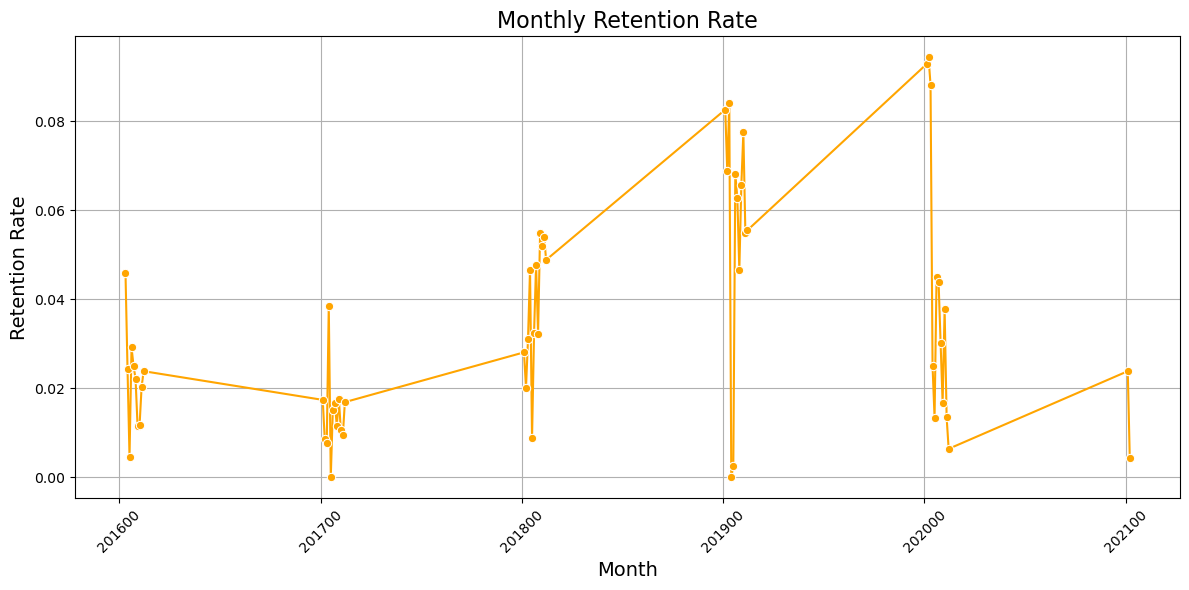

In [119]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_retention, x='order_year_month', y='RetentionRate', marker='o', color='orange')

# Customize labels and title
plt.title('Monthly Retention Rate', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Retention Rate', fontsize=14)

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# Cohort Based Retention Rate

Another way to measure Retention Rate is by analyzing it for each cohort, defined by the year and month of customers' first purchases. We will measure the percentage of customers retained after their first purchase in each subsequent month. This approach will help us understand how retention rates differ between recent and older cohorts, and whether recent changes in customer experience have impacted the retention of new customers.

In [121]:
df_retention = pd.crosstab(user_purchase['customer_key'], user_purchase['order_year_month']).reset_index()
df_retention

order_year_month,customer_key,201601,201602,201603,201604,201605,201606,201607,201608,201609,...,202005,202006,202007,202008,202009,202010,202011,202012,202101,202102
0,301,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,325,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,554,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1042,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1314,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11882,2099383,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11883,2099600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11884,2099758,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11885,2099862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df_retention = pd.merge(df_retention, min_purchase[['customer_key', 'MinPurchaseYearMonth']], on='customer_key')
new_column_names = [ 'm_' + str(column) for column in df_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
df_retention.columns = new_column_names

In [125]:
#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = df_retention[df_retention.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
df_retention = pd.DataFrame(retention_array)
df_retention.index = months

#showing new cohort based retention table
df_retention

,TotalUserCount,201602,201603,201604,201605,201606,201607,201608,201609,201610,...,202005,202006,202007,202008,202009,202010,202011,202012,202101,202102
order_year_month,,,,,,,,,,,,,,,,,,,,,
201602,318,1.0,0.02,0.00,0.01,0.02,0.02,0.01,0.02,0.01,...,0.01,0.04,0.03,0.02,0.01,0.01,0.02,0.03,0.03,0.03
201603,103,NaN,1.00,0.01,0.00,0.03,0.03,0.00,0.02,0.04,...,0.03,0.04,0.03,0.01,0.00,0.00,0.01,0.02,0.00,0.02
201604,39,NaN,NaN,1.00,0.03,0.00,0.03,0.00,0.00,0.00,...,0.00,0.00,0.03,0.05,0.00,0.00,0.00,0.00,0.05,0.03
201605,213,NaN,NaN,NaN,1.00,0.03,0.02,0.03,0.02,0.02,...,0.03,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.02
201606,220,NaN,NaN,NaN,NaN,1.00,0.02,0.02,0.02,0.05,...,0.04,0.01,0.02,0.01,0.00,0.00,0.02,0.02,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202010,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.03,0.03
202011,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.03,0.00
202012,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.03,0.02
